# AVR-C

A compiled notebook written from [video tutorials](https://www.youtube.com/playlist?list=PLVT2wB-IEJ0By8e-VMSGATXUQRsErBF-j) of Craig Hollinger, the website [garretlab](https://garretlab.web.fc2.com/en/arduino/inside/index.html), from the [Arduino Forum](https://forum.arduino.cc/), from the [AVRFreaks Forum](https://www.avrfreaks.net/forum), from [Nick Gammon](https://www.gammon.com.au/forum/bbshowpost.php?bbtopic_id=123), from Stackoverflow, from Quora and many other more resources that I wouldn't mention anymore.

This was all compiled and written to Jupyters notebook : 

* To make it more readable
* Clear flow of topics
* Print information from lot of resources without going through proper citations
* And lastly, for the Author's convenience

**Some of the (statements, images and codes) were directly copied** and **the author acknowledge that he does not own the said copied (statements, images and codes) that are written hereof**. The License can be seen on this Github repository for future use of the public.

### The *main*

In C, all the programs are written in **void main(void)**. However in Arduino we can't really see this *void main(void)* unless we find it in the source code. And if we do, we can see that it encapsulates void setup() and void loop():

                                                    <intentional space>                                                         

### Different means of Communicating with other MCU

* I2C.c

Now, most of the accelerometer, gyroscope, magnetometer are communicated in I2C communication bus which is commonly known in Arduino as 
**Wire** or Wire.h, Wire.c. In Atmel Studio this I2C bus is known as **TWI** or Two Wire Interface. Atmega328 has an I2C peripheral to communicate
with other devices using the I2C bus.

* SPI.c

For devices such as display might use the SPI bus. It is another form of communication and has another format from I2C.

* UART.c

For devices such as GPS, there is another peripheral for that which is UART.

* adxl3245.c

Aside from communication files, we also need diver files or the codes that run specific devices. We also need to write them so 
we can communication with such device.

                                                    <intentional space>                                                         

### HEADER files

Header or **.h** files are the files that produced when we compile our **.c** code and those .h are the ones being included in our **main**.
These **.h** files are being written in #include. Sometimes we also need to specify where the address/path of this **.h** files.

The *#include <avr/io.h>* is automatically included in Atmel Studio. What it does is that it defines all the registers and bits in the 
registers in the MCU you selected.

                                                    <intentional space>                                                         

### Ports and Pins

Aside from communication files, we also need driver files or the codes that run specific devices. We also need to write them so 
we can communication with such device.

In the schematic of Atmega328, we can see that the pins are connected in every Port. We can see Port B , Port C etc. but for no reason AVR doesn't have Port A. AVR microcontroller were designed such that every port has 8 pins.

In blinking the stock led of the Arduino Board we can see if we follow the schematic that the led is connected to Port Pin B5.
Atmega328 has 3 Ports : Port B, Port C and Port D. Of each port there is a separate register that controls them. One register is called DDR which stands for **Date Direction Register** which sets and clear bits in that register. Another register associated with Ports is called Pin, and that is when we read that register, we read whatever the state on that pin whether its a high or a low. And the third register is called Port and when we write to that register, we write to the IO pin selected. 

If we go to the Atmega328 datasheet and find PortB7 and PortB6, we should take note that this pins are already hooked up in the arduino since it is where the Crystal Oscillator are connected and so they are not available as IO pins. 


                                                    <intentional space>                                                         

### Bit Operations

In C, there is an special operator aside from the +, - , *, / we knew. It is called bit shifting.

For example we will bit shift:

Remember that everything in the microcontroller is in binary hence the 5 needs to be converted into 8 bit binary which is:

Also we need to take note that the format follows, **Number** << **How much Shift** and shifting the bits for 4 places, will make:

Remember that the bits being removed through the process of shifting will be replaced with 0's.

##### AND (Truth Table)

##### OR (Truth Table)

##### Mask

MASK is defined as a byte or set of bits we AND or OR with another bit to get what we want for that bit.

* Get

Getting a value of a certain bit, Say we want to know the value of a 3rd bit in a byte.

Here we can see that the output will be equal to 1 which is the value of the 3rd bit.

* Clear

Clearing a certain bit.

To see clearly, let's assume that x as 1:

Hence the Output will be x!.

Another, lets assume that x is 0:

Hence the Ouput is again x!

Here, we see that we clear a certain bit without affecting all other bits.

* Write

Writing to a certain bit.

To see clearly, let's assume that x as 1:

Hence the Output will be x!.

Another, lets assume that x is 0:

Hence the Ouput is again x!

Again, we write to a certain bit without affecting others.

                                                    <intentional space>                                                         

### Blink Sketch

Blink the stock led on the Arduino Uno board.

This header file includes all the registers and bits for the MCU we selected.

 Library for delay.

Define the Clock Speed which is 16 Mhz or 16 000 000 Hertz. The reason why we put 'UL' at the end of 16000000 is because we want to let the MCU know that the *F_CPU* contains a big number or Unsigned Long. Long is a 4 byte variable hence it can hold values up to 0 -> $2^{32}$ or 0 $ \rightarrow $ 4,294,967,296 and hence includes 16,000,000

First is we need to define the Pin as output in the Data Direction Register, this can be done in many different ways, one way is by defining it as binary. Take note that the Port Pin numbering starts from $ 0 \rightarrow 7$ and Port Pin 0 is the rightmost in the binary.

Setting Port Pin B5 as output:

However doing this would modify all the other bits to **0**. This is only good for our application since we are not interested in all in all other bits except the Port Pin B5.

#### AVR Studio 7 Simulator

DDRB = 0b00100000; 
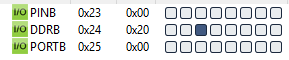

PORTB = 0b00100000;
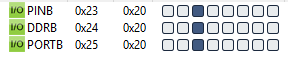

PORTB = 0b00000000;
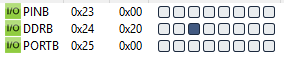


If your're wondering why PINB is changing along with PORTB even though it is not modified. It was explained here:
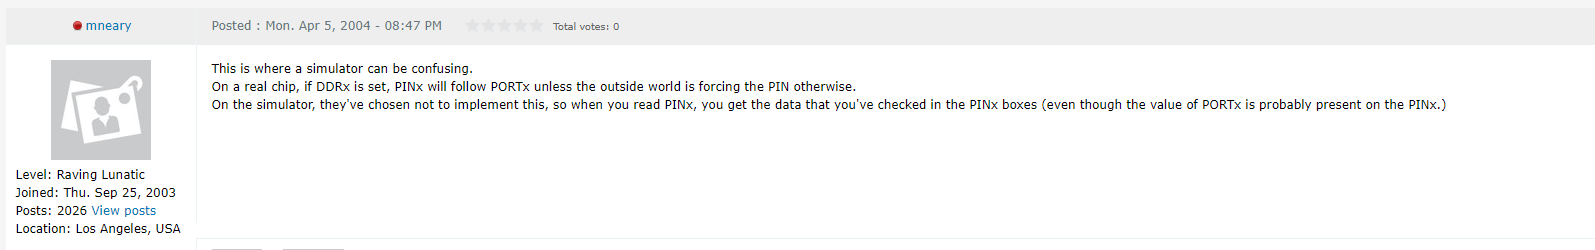

And he mentioned that in the OLDER simulators, PINx is not following PORTx since in the real world it should be. Now in AS7, it is modified to follow whatever PINx and PORTx states are.

                                                    <intentional space>                                                         

### BlinkMany Sketch

Blink 6 leds using 3 Pins.

Define Blink delay as 500 milliseconds

Function Declarations: 

Function Declarations are used to declare functions ahead before even defining it. It is always the correct way of dealing with functions with C. A function declaration tells the compiler about a function's name, return type, and parameters. A function definition provides the actual body of the function.

Make Port Pin D2, D3, D4 as outputs. This is actually WRITE bit operation.

To see better what we do above:
*POTD2 = 2, PORTD3 = 3, PORTD4 = 4*

*(1 << PORTD2)* is shifting 1 into two positions. 

*(1 << PORTD3)* is shifting 1 into three positions.

*(1 << PORTD4)* is shifting 1 into four positions.

ORing them all:

ORing with DDRD:

Hence, we set the three pins without affecting others.

Set Port Pin D2, D3, D4 active LOW. This is actually CLEAR bit operation.

To see better what we do above: 
*POTD2 = 2, PORTD3 = 3, PORTD4 = 4*

*(1 << PORTD2)* is shifting 1 into two positions. 

Negating is changing 1 to 0, and 0 to 1:

*(1 << PORTD3)* is shifting 1 into three positions.

*(1 << PORTD4)* is shifting 1 into four positions.

ANDing them all:

ANDing with PORTD:

Function Definitions:

This is where we define our functions. Actually the Function Definition starts with *void LED1()*, but for the sake of simplicity we didn't include it here.

                                                    <intentional space>                                                         

### The secrets of pinMode

To simplify things with cryptographic way of bit operations, we will write a simplified functions for those. Well, actually instead of writing a whole new function, we will take a look on how Arduino did it with C++. Let's not reinvent the wheel.

However, there are many prerequisite before we tackle directly into the code.

#### pinMode()
* Processor Directive
* PROGMEM
* _BV()
* pgm_read_byte()
* pgm_read_word()
* digitalPinToBitMask()
    * digital_pin_to_bit_mask_PGM[]
* digitalPinToPort()
    * digital_pin_to_port_PGM[]
* portModeRegister()
    * port_to_mode_PGM[]
* portOutputRegister()
    * port_to_output_PGM[]


                                    <intentional space> 

##### Processor Directive

Preprocessor directives are lines included in the code of programs preceded by a hash sign (#). These lines are not program statements but directives for the preprocessor. The preprocessor examines the code before actual compilation of code begins and resolves all these directives before any code is actually generated by regular statements.

These preprocessor directives extend only across a single line of code. As soon as a newline character is found, the preprocessor directive is ends. No semicolon (;) is expected at the end of a preprocessor directive. The only way a preprocessor directive can extend through more than one line is by preceding the newline character at the end of the line by a backslash (\).

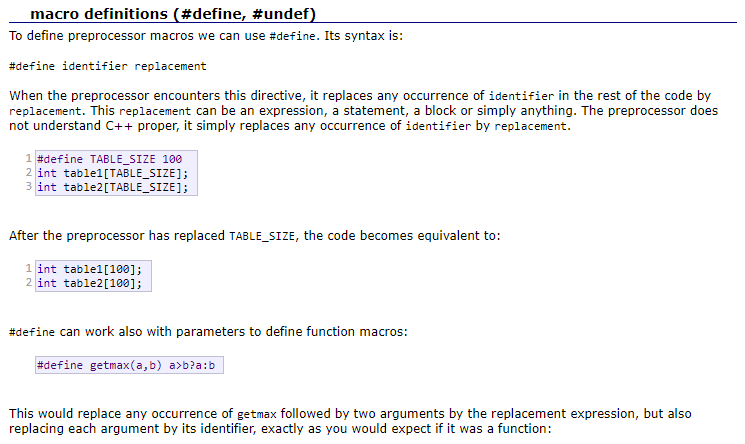

##### PROGMEM

Before that, lets define the different types of memory in AVR.

* Flash memory (program space) 

is where the Arduino sketch is stored.

* SRAM (static random access memory)

is where the sketch creates and manipulates variables when it runs.

* EEPROM 

is memory space that programmers can use to store long-term information.

Flash memory and EEPROM memory are non-volatile (**the information persists after the power is turned off**) . SRAM is volatile and will be lost when the power is cycled. Note: Flash (PROGMEM) memory can only be populated at program burn time. You can’t change the values in the flash after the program has started running. 

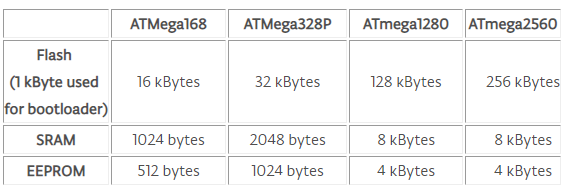

One thing you will notice in the chart above is that there is a lot more Flash (program) memory than SRAM available. When you create variables with the Arduino language such as:

You are copying 33 bytes (1 char = 1 byte, plus terminating null) from program memory into SRAM before using it. 33 bytes isn't a lot of memory in a pool of 1024 bytes, but if the sketch requires some large unchanging data structures - such as a large amount of text to send to a display, or a large lookup table, for example - using flash memory (program memory) directly for storage may be the only option. To do this, use the PROGMEM keyword.

PROGMEM is primarily used to store strings or arrays, in the FLASH and not in the RAM. When strings are used in the program, they are usually hard coded into firmwares source code. 

While this seems the most logical way of using strings, it is not the most optimal. Common sense and intuition would dictate that the compiler would store the string in the program memory, and read it out byte-by-byte inside the *LCD_puts()* routine. But this is not what happens. Because the *LCD_puts()* routine (or other string routines) are designed to work with strings in RAM,the compiler is forced to read out the entire string constant from program memory into RAM, and then pass the string’s RAM pointer to the routine (in this case *LCD_puts()*).

It certainly works but the RAM wastage adds up to significant amounts with each string. Why? Initial variable values and strings are copied out from program memory into RAM as part of the C startup routines, which execute before your main() function. Those startup routines give your globals their initial values, as well as ensure that all strings are inside RAM so they can be passed to your desired string handling routines.  As more strings are added to your program, more data must be copied to RAM at startup and the more RAM is used up by holding static (unchanging) data.The solution to the problem is forcing strings to stay in program memory and only be read out as they are needed.

To force a string into program memory, we can now use thePROGMEM attribute modifier on our string constants.  An example of a global string which is stored into program memory and not copied outat execution time is:

In older AVR-GCC versions, variables tagged with the PROGMEM attribute don’t have to also explicitly be marked as const, however this is changing in newer releases. To prevent compile time warnings,we add this to the variable’s declaration

                                                    <intentional space>                                                         

##### _BV

The BV() is defined in **hardware/tools/avr/avr/include/avr/sfr_defs.h**, as shown below. This will be automatically included during *#include <avr/io.h>* .

The _BV() is a macro that shifts 1 to left by the specified number. For example, would be:

would be

                                    <intentional space> 

#####  pgm_read_byte()

The *pgm_read_byte()* is a macro that reads a byte of data stored in a specified address(PROGMEM area).

The *pgm_read_byte()* is defined in **hardware/tools/avr/avr/include/avr/pgmspace.h** as below.

Note! I don't know why the parameter/argument is named (address_short) but certainly it is not accepting an address or pointer. It accepts an 8 bit variable.

                                                    <intentional space>                                                         

#####  pgm_read_word()

The *pgm_read_word()* is a macro that read a word of data stored in a specified address(PROGMEM area).

The *pgm_read_word()* is defined in **hardware/tools/avr/avr/include/avr/pgmspace.h** as below.

Note! I don't know why the parameter/argument is named (address_short) but certainly it is not accepting an address or pointer. It accepts an 16 bit variable.

                                                    <intentional space>                                                         

##### digitalPinToBitMask()

The *digitalPinToBitMask()* is defined in **hardware/arduino/cores/arduino/Arduino.h** as below.

The input is *P*. The macro calls *pgm_read_byte()* with an argument *digital_pin_to_bit_mask_PGM + (P)*.

The *digital_pin_to_bit_mask_PGM* is defined in **hardware/arduino/variants/standard/pins_arduino.h**(in case of Arduino Uno). It is an array shown below. As this array is declared as PROGMEM, it is placed on flash memory rather than SRAM.

As the *digital_pin_to_bit_mask_PGM* is an array, adding (P) to the *digital_pin_to_bit_mask_PGM* means the (P+1th) element of the array. In C++ language, the element of array $x[i]$ can be accessed by $(i + 1)$. For example, if the (P) is 13, the fourteenth element(note that the elements begins with 0) of the array, that is *_BV(5)*, is returned.

As a result *digitalPinToBitMask()* returns the (P+1)th element of *digital_pin_to_bit_mask_PGM* which is placed on the flash memory.

This may be absurd at first as to why do we need to pile them up starting from Port D to Port B and finally to Port C. To better understand this idea, it is helpful to see how the arduino Digital Pins and Analog Pins are line up:

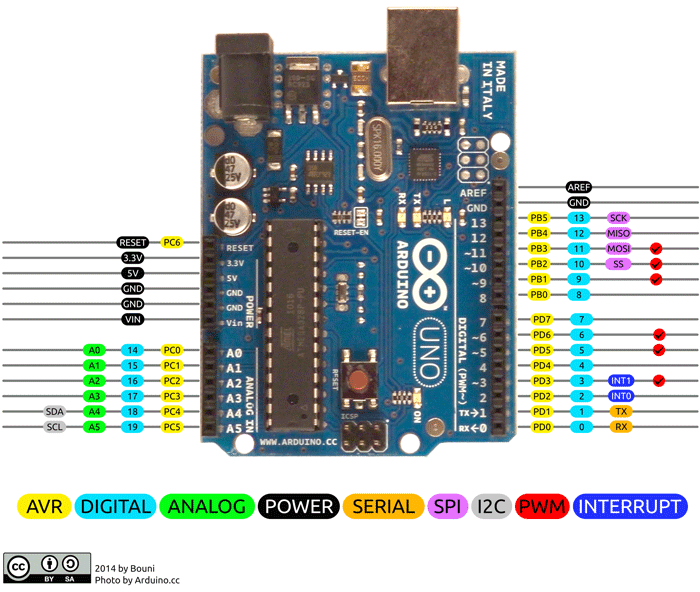

We will find that Pin 0 correspond to *_BV(0)* at Port D and Pin 14 is *_BV(0)* to Port C. Note! *_BV(0)* doesn't mean that we are not shifting 1, it means that we are shifting 1 into the first element or zeroth index.

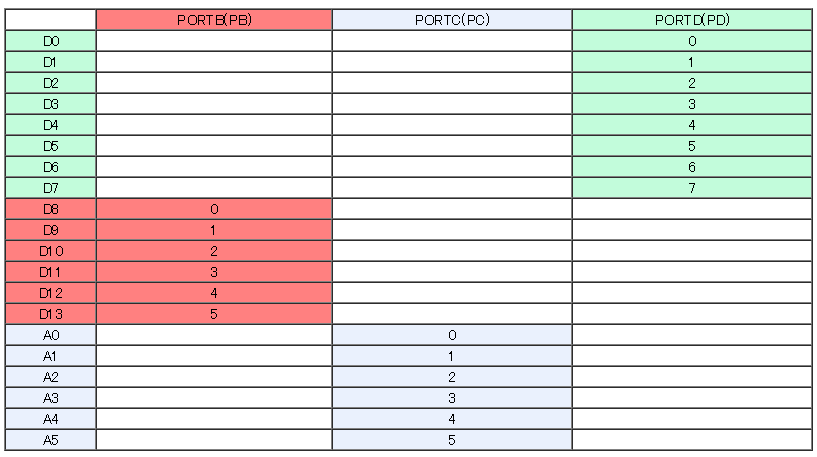

                                                    <intentional space>                                                         

##### digitalPinToPort()

The *digitalPinToPort()* is a macro that returns the port of a specified pin or the (Letter of the Pin) in simple words. The digitalPinToPort() is defined in **hardware/arduino/cores/arduino/Arduino.h** as below.

The input is P. The macro calls *pgm_read_byte()* with an argument *digital_pin_to_port_PGM + (P)*. The *digital_pin_to_port_PGM* is defined in **hardware/arduino/variants/standard/pins_arduino.h**(in case of Arduino Uno). It is an array shown below. As this array is declared as *PROGMEM*, it is placed on flash memory rather than *SRAM*. 

This is the same idea as *digitalPinToBitMask()* above. However since the function *pgm_read_byte()*, we can't read chars. And yes, *PD, PB, and PC* have corresponding values from **hardware/arduino/cores/arduino/Arduino.h**.

                                                    <intentional space>                                                         

#### portModeRegister()

The *portModeRegister()* is a macro that returns a mode register that controls the mode of the specified port. The *portModeRegister()* is defined in **hardware/arduino/cores/arduino/Arduino.h** as below.

The input is P. The macro calls *pgm_read_word()* with an argument *pin_to_mode_PGM + (P)*.

The *port_to_mode_PGM* is defined in **hardware/arduino/variants/standard/pins_arduino.h**(in case of Arduino Uno). It is an array shown below. As this array is declared as *PROGMEM*, it is placed on flash memory rather than *SRAM*.

As the *port_to_mode_PGM* is an array, adding (P) to the port_to_mode_PGM means the (P+1)th element of the array. In C++ language, the element of array $x[i]$ can be accessed by $(i + 1)$. For example, if the 

The third element(note that the elements begins with 0) of the array, that is the address of *DDRB*, is returned.

                                                    <intentional space>                                                         

#### portOutputRegister()

The *portOutputRegister()* is a macro that returns an output port register of the specified port. The *portOutputRegister()* is defined in **hardware/arduino/cores/arduino/Arduino.h** as below.

The input is P. The macro calls *pgm_read_word()* with an argument *port_to_output_PGM + (P)*.

The *port_to_output_PGM* is defined in **hardware/arduino/variants/standard/pins_arduino.h**(in case of Arduino Uno). It is an array shown below. As this array is declared as *PROGMEM*, it is placed on flash memory rather than *SRAM*.

As the *port_to_output_PGM* is an array, adding (P) to the *port_to_output_PGM* means the (P+1)th element of the array. In C++ language, the element of array $x[i]$ can be accessed by $(i + 1)$. For example, if the P is PB(2), the third element(note that the elements begins with 0) of the array, that is the address of PORTB, is returned.

*PORTB, PORTC and PORTD* are registers to execute input or output of digital pins. As a result of *portOutputRegister()*, it returns the (P+1)th element of *port_to_output_PGM* that is placed on flash memory.

                                                    <intentional space>                                                         

##### Finally! pinMode()

We will recap all the functions or macros we have discussed so far. And analyze step by step each code for the *pinMode()*.

Say we want:

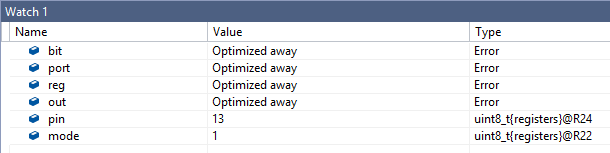

First calculate the bit mask, which bit in the PORTx, of the pin.

It will return:

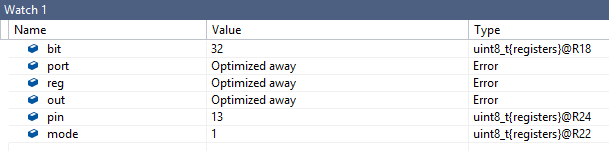

Next, calculate a port corresponds to the pin.

It will return:

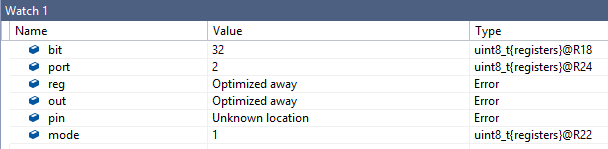

If the port is *NOT_A_PIN*, the function returns without doing anything more.

I think it might be better to compare with *NOT_A_PORT* rather than with *NOT_A_PIN*. Anyway both are defined as **0**.

Then, convert the port to a register. It converts the port to the address of DDR. It returns *DDRB, DDRC or DDRD* according to the port. If the port is *PB*, it returns *DDRB*.

However, *&PORTB* means the address of the register *PORTB*, which we can find in the I/O in AS7.

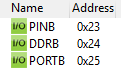
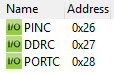
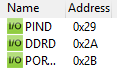

Hence,

It will return:

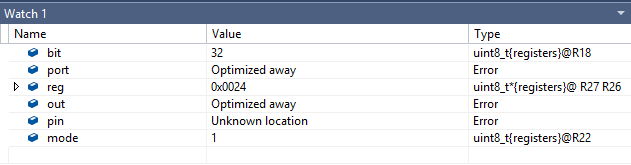

Take note that *portModeRegister()* uses *read_word()* instead of *read_byte()* because **On the ATmega1280, the addresses of some of the port registers are greater than 255, so we can't store them in uint8_t's according to Arduino.h**

Next convert the port to PORTx:

It will return:

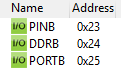
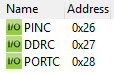
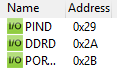

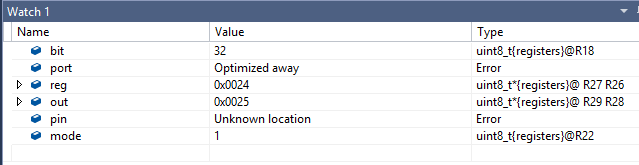

Next line is,

The *SREG* is a status register which holds interrupt enable flag, carry flag and so on. Before changing the pin mode, *SREG* is stored to *oldSREG*. Then disable an interrupt using *cli()*.

But why disable interrupts? From a question in Stackoverflow and Arduino Forum:

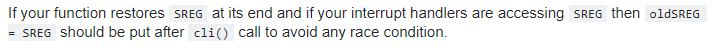

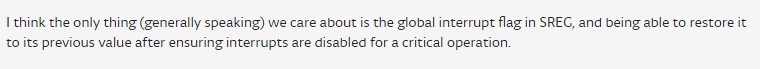

Since, assigning a pin is made during startup and very critical for the program to run properly. I think, it makes the perfect reason to disable interrupts such as pin-change interrupts.

Also, the use of assigning *oldSREG = SREG* and loading it back is explained by Nick Gammon:

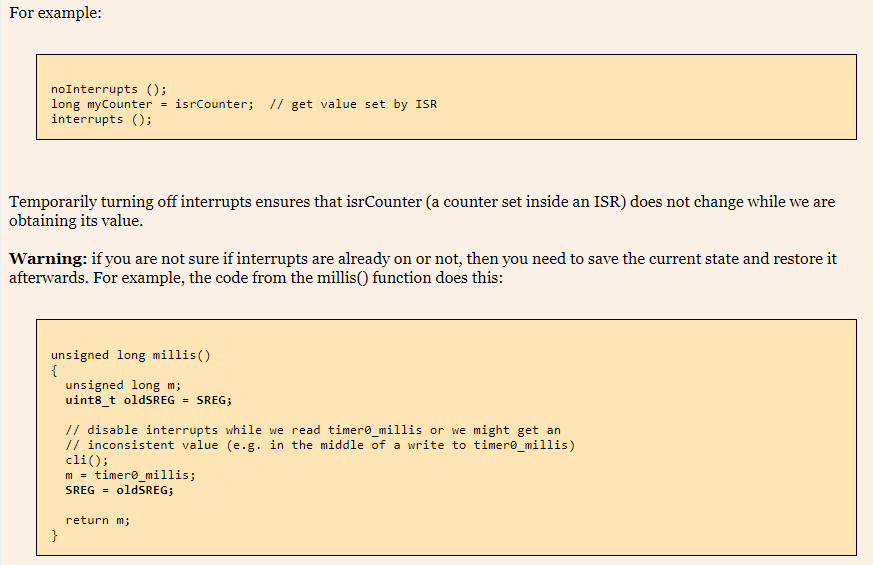

The * is a like a function that takes the value of an address. We know that *reg = 0x24* which is the address of *DDRB*. Then *reg will take the value of DDRB.

Familiar? This is actually the same as CLEAR bit operation.

To make things clearer is we will encapsulate this in another preprocessor directive.

Note: that will not happen in our example from above since we set pinMode as *OUTPUT* and this will only trigger in *pinMode* was set to *INPUT*.

Now, going to *INPUT_PULLUP*:

Now, this is the WRITE bit operation:

That is, if we want to make a pin *INPUT_PULLUP* then we need to set DDRx as *INPUT* and make PORTx as *OUTPUT*. Here Arduino Forum explain what is the use of *INPUT_PULLUP* rather than using an external resistor. 

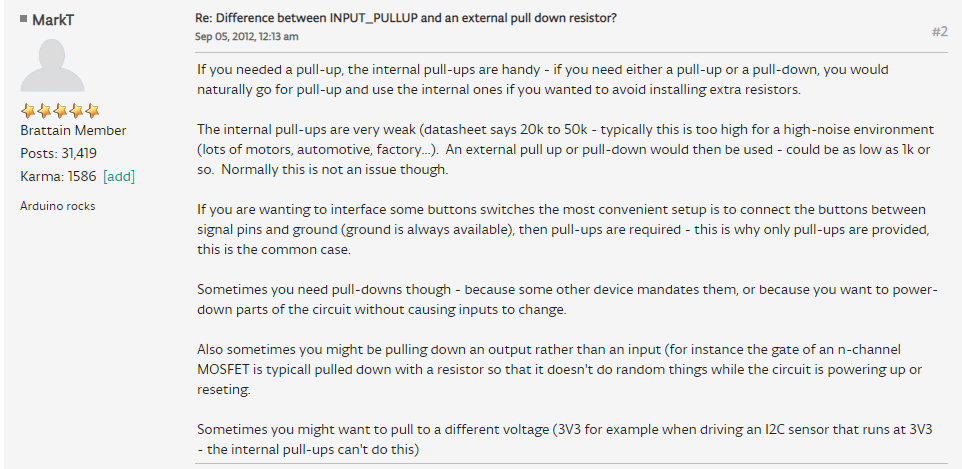

Encapsulating in another preprocessor directive.

Lastly, for the OUTPUT:

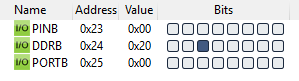

And is the same as *pinMode_writeBit()* except it will be used in *DDRB* instead of *PORTB* that was used in above.

Remeber that *INPUT, INPUT_PULLUP* and *OUTPUT* is not native to the compiler but was made to make it easier for the readers to understand the code.

From **hardware/arduino/cores/arduino/Arduino.h**:

The **modified** *pinMode()*:

                                                    <intentional space>                                                         

### digitalRead

The digitalRead() returns if the specified pin is HIGH or LOW. If the value of the corresponding bit of the register is 1 it returns HIGH, if 0 it returns LOW.

The *digitalRead()* is defined in **hardware/arduino/cores/arduino/wiring_digital.c** as below.

Say,

The input argument is *pin*. The type of the variable is uint8_t. First calculate the timer of the pin. Some of the digital pin are related to timer. These pins can output PWM. First calculate the timer of the pin. Some of the digital pin are related to timer. These pins can output PWM.

##### digitalPinToTimer()

The *digitalPinToTimer()* is a macro that returns the timer of a specified pin. The *digitalPinToTimer()* is defined in **hardware/arduino/cores/arduino/Arduino.h** as below.

The input is P. The macro calls *pgm_read_byte()* with an argument *digital_pin_to_timer_PGM + (P)*.

The *digital_pin_to_timer_PGM* is defined in **hardware/arduino/variants/standard/pins_arduino.h**(in case of Arduino Uno). It is an array shown below. As this array is declared as *PROGMEM*, it is placed on flash memory rather than *SRAM*.

As the *digital_pin_to_timer_PGM* is an array, adding (P) to the *digital_pin_to_timer_PGM* means the (P+1)th element of the array. In C++ language, the element of array $x[i]$ can be accessed by $(i + 1)$. For example, if the P is 3, the fortth element(note that the elements begins with 0) of the array, that is *TIMER2B*, is returned.

Hence,

And knowing that *NOT_ON_TIMER* represents binary value from **hardware/arduino/variants/standard/pins_arduino.h**.

Next calculate the bit mask, which bit in the PORTx, of the pin.

Next, calculate a port corresponds to the pin.

If the port is *NOT_A_PIN*, the function returns *LOW*. Also it will automatically terminate the function. As explained here:

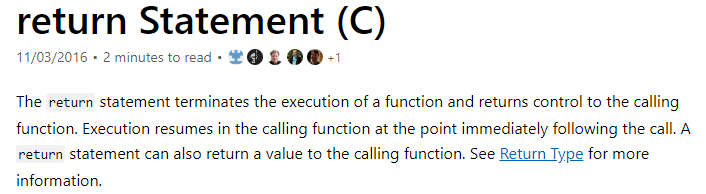

Which means that if we passed the a wrong pin in *digitalRead()*, then we will automatically read a *LOW* or **no reading**.

If the pin is related to a timer, PWM output is stopped. Remember that the statement is *if timer is **not** NOT ON TIMER*, which means *if timer is ON TIMER*, then *turnOffPWM(timer)*.

##### turnOffPWM()

The *turnOffPWM()* stops PWM output of a specified timer. Please refer to the explanation of the *analogWrite()*. Stopping the PWM output is carried out by controlling timer/counter register. 

This will be skipped for this the reason it will be better discussed in the Timer/Counter section.

After that, the port is converted to a register, then calculate logical AND with bit. If the result is not 0, the function returns HIGH, else it returns LOW. 

To make things clearer:

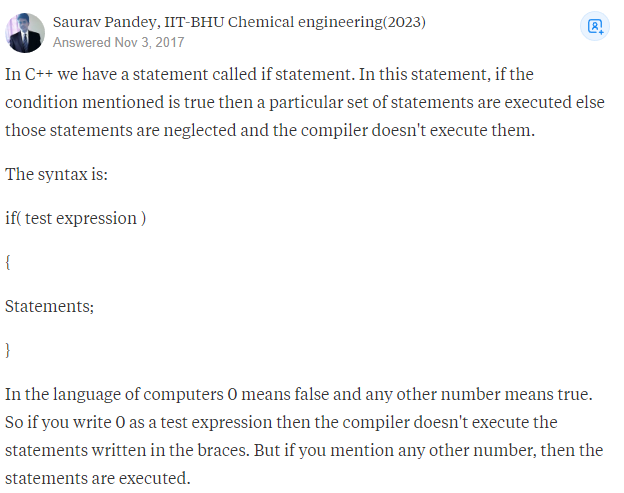

Remember that *if(0)* happens, it will call to *return HIGH* and ends the *digitalRead()* function block. However, if *if(!0)* then it doesn't call *return HIGH* but will call *return LOW* and ends the function block. So in some sense, it is still an if-else statement. 

Familiar? If $x = 1$, then we will get *0b01000000* and we will return *HIGH*, which means we read a voltage above the threshold. If  $x = 0$, then we will get *0b00000000* and we will return *LOW*, and means we didn't read any voltage. 

Well, this is GET bit operation, as we can see below:

Now, encapsulating it in preprocessor directive or macro:

And the **modified** *digitalRead()*:

                                                    <intentional space>                                                         

### digitalWrite

The *digitalWrite()* sets the specified digital pin to *HIGH* or *LOW*. To make the pin *HIGH* it sets the value of the corresponding bit of the register to 1, or to make the pin *LOW*, it sets the bit 0.

There are three registers, PORTB, PORTC and PORTD. The relation of the registers and the pins of Arduino Uno is shown below. Ax is an analog pin, Dx is a digital pin. The digitalWrite() is defined in **hardware/arduino/cores/arduino/wiring_digital.c** as below.

The input arguments are pin and val. The type of the arguments is uint8_t.

First calculate the timer of the pin. Some of the digital pin are related to timer. These pins can output PWM.

Say,

Next calculate the bit mask, which bit in the PORTx, of the pin.

Next, calculate a port corresponds to the pin.

Next,

Next is the *SREG*,

If we input *LOW* then it will do a clear:

else, which is *HIGH*, it will do a write:

                                                    <intentional space>                                                         

### Timer0


#### The Counting Register

TCNT0 - **Timer Counter Zero**, is a special register that we can write to it and read from it. It can also modified by two taps, a clock and a direction. We can increment the *TCNT0* by 1 or decrement it by 1 everytime we give a pulse on it and depending on the direction. The source of this clock determines whether it is a timer or a counter can come from an IO pin outside the chip. It can run asynchronously, which means its not timed with the main timer in the microcontroller or the *F_CPU*.

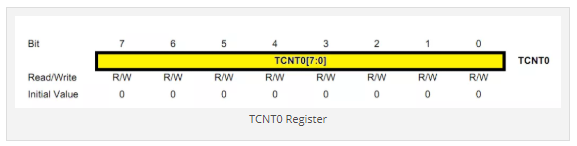

This register becomes a counter if the **clk** pulse is not a regular frequency, say we have a sensor that gives a signal whenever it detects a car that pass bay. Then *TCNT0* would be a counter. However if a clk pulse is a regular pulse then it is being used as a timer. And the signal from that comes from the microprocessor main oscillator or *F_CPU*. 

*F_CPU* can be divided into lower speeds when we tap into it. It is called pre scaler and what it does is it divides the *F_CPU* by 2 or by 4 or by 8, etc. We just have to set high some of the taps so the correct pre scaler can be set. So summing it up, a microcontroller can have a clock internally by *F_CPU* which can be divided depending on what pre scaler was set. Also we can have an external clock. Of which, these clocks will be used as our timer and counter.

The TCNT0 is an 8-bit counter which means it holds values from $ 0 \rightarrow 255 $. Which means these register can count up to 255 and when it reach  the 255, or 0b11111111, on the next clock pulse it restarts all over again to 0b00000000. That is called a roll over or an overflow. And there is some logic in the TCNT register that detects an overflow which sets a flag which can be used as an interrupt, an interrupt on a counter timer overflow.

Similarly a 16 bit timer is capable of counting $2^{16} = 65536$ steps from $0 \rightarrow 65535$. Due to this feature, timers are also known as counters. Now what happens once they reach their MAX? Does the program stop executing? Well, the answer is quite simple. It returns to its initial value of zero. We say that the timer/counter **overflows**.

The **clk pulse** can be generated by an external clock, see the image below:

#### External vs Internal Clock

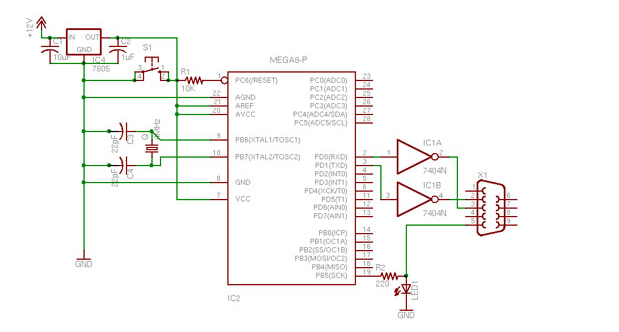
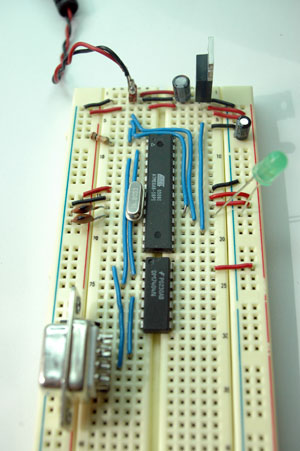

or by using the internal clock:

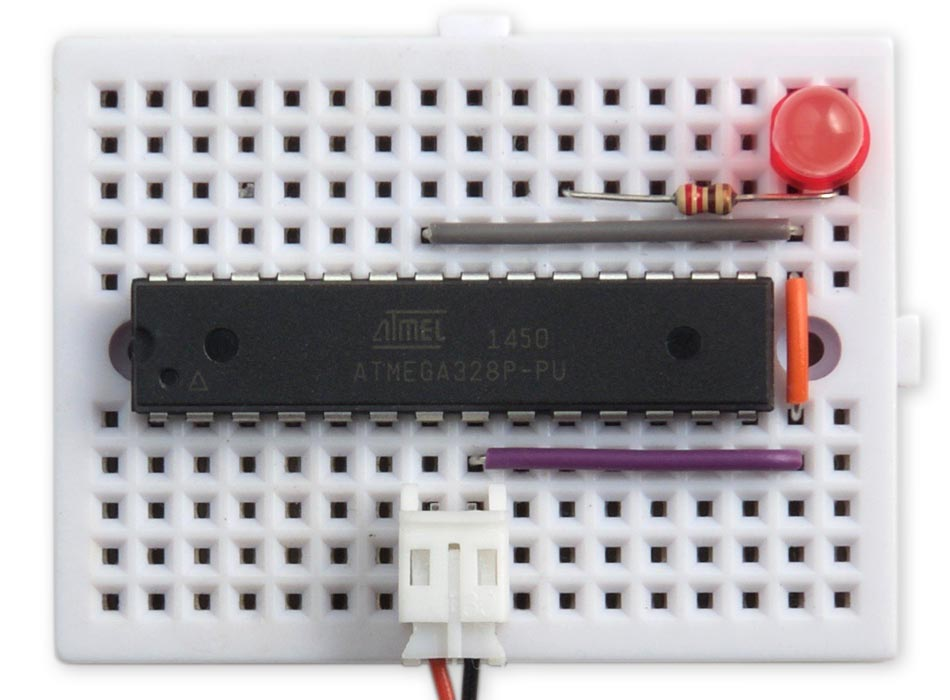

However, we will not modify the code if we want to setup the MCU using the internal or external clock but instead, we will change the fuse. 

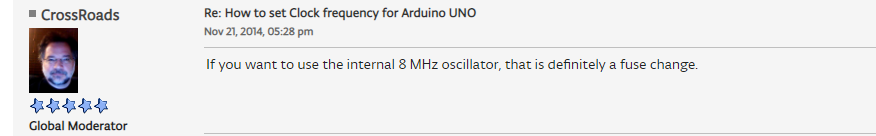

But if our goal is to reduce the speed, we can always choose from the prescaler. Prescaler acts as a divider for time, which will be discussed in more details later.

In ATMEGA328p, we have three different kinds of timers:

* TIMER0 $\rightarrow$ 8-bit timer
* TIMER1 $\rightarrow$ 16-bit timer
* TIMER2 $\rightarrow$ 8-bit timer

The best part is that the timer is totally independent of the CPU. Thus, it runs parallel to the CPU and there is no CPU’s intervention, which makes the timer quite accurate.

                                                    <intentional space>                                                         

#### Timer Concepts

We are all familiar with $Period = 1/Frequency$. Now suppose, we need to flash an LED every $10 ms$. This implies that its frequency is $1/10ms = 100 Hz$. Now let’s assume that we have an external crystal XTAL of $4 MHz$. Hence, the CPU clock frequency is $4 MHz$. Now, as I said that the timer counts from 0 to TOP. For an 8-bit timer, it counts from 0 to 255 whereas for a 16-bit timer it counts from 0 to 65535. After that, they overflow. This value changes at  every clock pulse.

Let’s say the timer’s value is zero now. To go from 0 to 1, it takes **one clock pulse**. To go from 1 to 2, it takes another clock pulse. To go from 2 to 3, it takes one more clock pulse. And so on. For *F_CPUZ* = $4 MHz$, time period $T = 1/4,000,000 Hz = 0.00025 ms$. **Thus for every transition (0 to 1, 1 to 2, etc), it takes only 0.00025 ms!**.

Now, as stated above, we need a delay of 10 ms. This maybe a very short delay, but for the microcontroller which has a resolution of 0.00025 ms, its quite a long delay! To get an idea of how long it takes, let’s calculate the timer count from the following formula:

$Timer Count = (Required Delay / Clock Time Period) - 1$

Substitute Required Delay = 10 ms and Clock Time Period = 0.00025 ms, and you get Timer Count = 39999. Can you imagine that? The clock has already ticked 39999 times to give a delay of only 10 ms! Now, to achieve this, we definitely cannot use an 8-bit timer (as it has an upper limit of 255, after which it overflows). Hence, we use a 16-bit timer (which is capable of counting up to 65535) to achieve this delay.

                                                    <intentional space>                                                         

##### Prescaler

Assuming *F_CPU* = $4 MHz$ and a 16-bit timer $(MAX = 65535)$, and substituting in the above formula, we can get a maximum delay of 16.384 ms. Now what if we need a greater delay, say 20 ms? We are stuck?!

Well hopefully, there lies a solution to this. Suppose if we decrease the *F_CPU* from $4 MHz$ to $0.5 MHz (i.e. 500 kHz)$, then the clock time period increases to $1/500KHz = 0.002 ms$. Now if we substitute Required Delay = 20 ms and Clock Time Period = 0.002 ms, we get Timer Count = 9999. As we can see, this can easily be achieved using a 16-bit timer. At this frequency, a maximum delay of 131.072 ms can be achieved.

Now, the question is how do we actually reduce the frequency? This technique of frequency division is called prescaling. We do not reduce the actual *F_CPU*. The actual *F_CPU* remains the same (at $4 MHz$ in this case). So basically, we derive a frequency from it to run the timer. Thus, while doing so, **we divide the frequency and use it**. There is a provision to do so in AVR by setting some bits which we will discuss later.

But don’t think that you can use prescaler freely. **It comes at a cost**. There is a trade-off between resolution and duration. As you must have seen above, the overall duration of measurement has increased from a mere 16.384 ms to 131.072 ms. So has the resolution. **The resolution has also increased from 0.00025 ms to 0.002 ms (technically the resolution has actually decreased)**. This means each tick will take 0.002 ms. So, what’s the problem with this? The problem is that the accuracy has decreased. Earlier, you were able to measure duration like 0.1125 ms accurately (0.1125/0.00025 = 450), but now you cannot (0.1125/0.002 = 56.25). The new timer can measure 0.112 ms and then 0.114 ms. No other value in between.

                                                    <intentional space>                                                         

#### Datasheet

Starting from page 94 on ATmega328p datasheet, we can find Timer 0. Timer 0 is an 8 bit Timer/Counter. 

It it important to note the notation **x and n** . x is used to denote Letters, DDRx. While n is used to denote numbers, TCNTn. Some definitions are:

* BOTTOM - 0x00
* MAX - 0xFF (decimal 255)
* TOP - The counter reaches the TOP when it becomes equal to the highest value in thecount sequence. The TOP value can be assigned to be the fixed value 0xFF(MAX) or the value stored in the OCR0A Register. The assignment is depen-dent on the mode of operation.

The Timer/Counter (TCNT0) and Output Compare Registers (OCR0A and OCR0B) are 8-bit registers. Interrupt request (abbreviated to Int.Req. in the figure) signals are all visible in the Timer Interrupt Flag Register (TIFR0). All interrupts are individually masked with the Timer Interrupt Mask Register (TIMSK0).

The Timer/Counter can be clocked internally, via the prescaler, or by an external clock source on the T0 pin. The Clock Select logic block controls which clock source and edge the Timer/Counter uses to increment (or decrement) its value. The Timer/Counter is inactive when no clock source is selected. The output from the Clock Select logic is referred to as the timer clock $(clk_{T0})$.

More definitions:

* count - Increment or decrement by 1
* direction - Select between increment and decrement
* clear - Clear TCNT0 (set all bits to zero)
* $clk_Tn$ - Timer or Clock, also referred as clk_T0 in the following
* top - Signalize that TCNT0 has reached maximum value
* bottom - Signalize that TCNT0 has reached minimum value (zero)

Other Registers:

* TCCR0 Register - **Timer/Counter Control Register** 

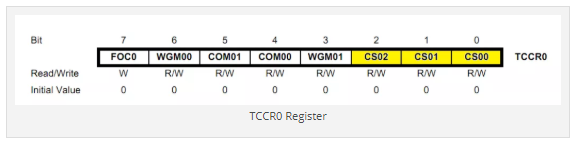

* TIMSK Register - TIMSK Register is as follows. It is a common register for all the three timers. For TIMER0, bits 1 and 0 are allotted. Right now, we are interested in the 0th bit TOIE0. Setting this bit to ‘1’ enables the TIMER0 overflow interrupt.

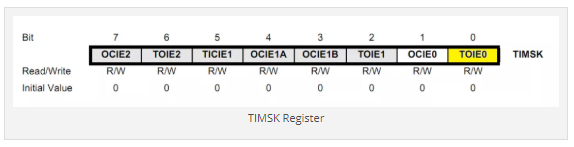

* TIFR Register - The **Timer/Counter Interrupt Flag Register** – TIFR is as follows. Even though we are not using it in our code, you should be aware of it. This is also a register shared by all the timers. Even here, bits 1 and 0 are allotted for TIMER0. At present we are interested in the 0th bit TOV0 bit. This bit is set (one) whenever TIMER0 overflows. This bit is reset (zero) whenever the Interrupt Service Routine (ISR) is executed. If there is no ISR to execute, we can clear it manually by writing one to it.

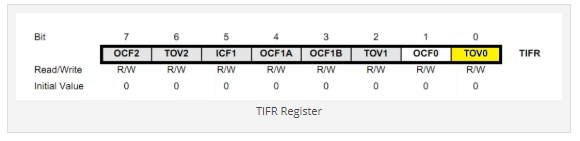

By selecting these three Clock Select Bits, CS02:00, we set the timer up by choosing proper prescaler. The possible combinations are shown below. 

Note: **CS02:00** means CS02 to CS00 which is CS02, CS01, and CS00.

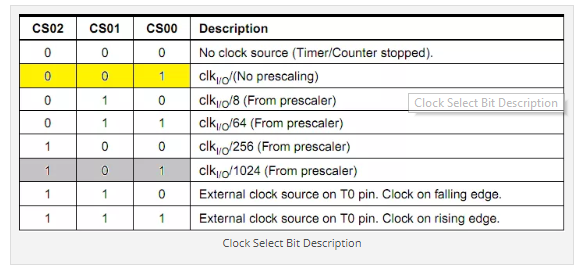

$clk_{T0}$ can be generated from an external or internal clock source,selected by the Clock Select bits (CS02:0). When no clock source is selected (CS02:0 = 0) thetimer is stopped. However, the TCNT0 value can be accessed by the CPU, regardless ofwhether $clk_{T0}$ is present or not. A CPU write overrides (has priority over) all counter clear or count operations.

 Output Compare Unit - The 8-bit comparator continuously compares TCNT0 with the Output Compare Registers(OCR0A and OCR0B). Whenever **TCNT0 equals OCR0A or OCR0B**, the comparator **signals a match**. A **match will set the Output Compare Flag (OCF0A or OCF0B) at the next timer clock cycle**. **If the corresponding interrupt is enabled**, the **Output Compare Flag generates an Output Compare interrupt**. The **Output Compare Flag is automatically cleared when the interrupt is executed**. Alternatively, the flag can be cleared by software by **writing a logical one to its I/O bit location**. 

http://maxembedded.com/2011/06/avr-timers-timer0/